## Data Science Project Proposal

### Introduction

According to the NY Department of Health, [1 in every 5 people die from heart disease](https://www.health.ny.gov/diseases/cardiovascular/heart_disease/#:~:text=About%20695%2C000%20people%20die%20of,killing%20approximately%20375%2C476%20people%20annually). Heart disease is a major concern to billions of people worldwide, But its casualties and consequences can be mitigated much more effectively when discovered early. This is why it'll be beneficial to be able to predict the status of heart disease in an individual using related factors. 
We will use the [provided dataset](https://archive.ics.uci.edu/dataset/45/heart+disease) involving 76 attributes of medical test data from Hungary, Switzerland, VA Long Beach, and Cleveland, using the latter in which we will obtain the data and investigate from. We decided to use the Cleveland database as it contains the largest amount of observations and 14 relevant attributes. We aim to use classification modelling with this data to study its relationship with heart disease using a few distinct variables. We can generalize our objective with a single question: 
Is it possible to predict an individual's chances of developing heart disease using only their prior medical test data?


### Preliminary Exploratory Data Analysis

Importing the libraries needed for the project.

In [108]:
# install and import packages
install.packages(c("languageserver", "repr", "tidymodels", "RColorBrewer"))
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

Warning message:
"packages 'repr', 'tidymodels', 'RColorBrewer' are in use and will not be installed"
Installing package into 'C:/Users/Jason/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'languageserver' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'languageserver'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Jason\AppData\Local\R\win-library\4.3\00LOCK\languageserver\libs\x64\languageserver.dll to C:\Users\Jason\AppData\Local\R\win-library\4.3\languageserver\libs\x64\languageserver.dll: Permission denied"
Warning message:
"restored 'languageserver'"



The downloaded binary packages are in
	C:\Users\Jason\AppData\Local\Temp\RtmpSm04Bp\downloaded_packages


Downloading and reading the <a href="https://archive.ics.uci.edu/dataset/45/heart+disease">data</a>.

In [109]:
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
dest <- "data/file.zip"

# checks if the data file exists
if (!dir.exists("data/")) {
  #creates the file if it doesn't exist
  dir.create("data/", recursive = TRUE)
}

# downloads the file from the url to data file
download.file(url, dest)

# unzips the file
unzip(zipfile = dest,
      files = "processed.cleveland.data",
      exdir = "data/")

# added column names to the data
cleveland_data_col_names <- c("age",
                              "sex",
                              "cp",
                              "trestbps",
                              "chol", "fbs",
                              "restecg", "thalach",
                              "exang",
                              "oldpeak",
                              "slope",
                              "ca",
                              "thal",
                              "num")

# reading the data by csv
cleveland_data <- read_csv("data/processed.cleveland.data",
                           col_names = cleveland_data_col_names)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Describing The Data

**Which features are available in the dataset?**

In [110]:
# taking a look at the features in the dataset
print(cleveland_data_col_names)

 [1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "num"     


**What type of data is in the dataset?**
- All of the variables in the dataset is already split into dbl and chr type.

In [111]:
# taking a look at the data patterns
glimpse(cleveland_data)

Rows: 303
Columns: 14
$ age      <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 5…
$ sex      <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1…
$ cp       <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1…
$ trestbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2…
$ thalach  <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 1…
$ exang    <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1…
$ oldpeak  <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0…
$ slope    <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2…
$ ca       <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0", "1.0"…
$ thal     <chr> "

**Are there feature containing missing data?**
- There are missing data in the `ca` and `thal` column

In [112]:
# making a tibble with column type and the number of nulls in each column
cleveland_summary <- tibble(
  ColumnName = cleveland_data_col_names,
  NumNulls = map_dbl(cleveland_data, ~sum(.x == "?", na.rm = TRUE)),
  NumNAs = map_dbl(cleveland_data, ~sum(is.na(.x))),
  TotalMissing = map_dbl(cleveland_data,
                         ~sum(.x == "?", na.rm = TRUE) + sum(is.na(.x))),
  ColumnType = map_chr(cleveland_data, ~class(.x))
)
print(cleveland_summary)

# A tibble: 14 × 5
   ColumnName NumNulls NumNAs TotalMissing ColumnType
   <chr>         <dbl>  <dbl>        <dbl> <chr>     
 1 age               0      0            0 numeric   
 2 sex               0      0            0 numeric   
 3 cp                0      0            0 numeric   
 4 trestbps          0      0            0 numeric   
 5 chol              0      0            0 numeric   
 6 fbs               0      0            0 numeric   
 7 restecg           0      0            0 numeric   
 8 thalach           0      0            0 numeric   
 9 exang             0      0            0 numeric   
10 oldpeak           0      0            0 numeric   
11 slope             0      0            0 numeric   
12 ca                4      0            4 character 
13 thal              2      0            2 character 
14 num               0      0            0 numeric   


**What are the unique values of each column?**

From this, we found that the columns: `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `num` is originally represented as categorical variables.

In [113]:
# Get all the unique values per column
cleveland_unique <- lapply(cleveland_data, unique)

# counts the number of different uniques per column
unique_counts <- sapply(cleveland_unique, length)

# only keep the columns where theres less than 10 uniques
cleveland_unique <- cleveland_unique[unique_counts < 10]

print(cleveland_unique)

$sex
[1] 1 0

$cp
[1] 1 4 3 2

$fbs
[1] 1 0

$restecg
[1] 2 0 1

$exang
[1] 0 1

$slope
[1] 3 2 1

$ca
[1] "0.0" "3.0" "2.0" "1.0" "?"  

$thal
[1] "6.0" "3.0" "7.0" "?"  

$num
[1] 0 2 1 3 4



#### Data Transformation

**Transforming the `ca` and `thal` column to dbl.**

In [114]:
cleveland_data <- cleveland_data |>
  mutate(ca = as.numeric(ca),
         thal = as.numeric(thal))
head(cleveland_data)

Warning message:
"There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning."


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


**Remove the rows containing NA or "?".**

In [115]:
# filtering the dataset so only the column without NA remains
cleveland_filtered <- cleveland_data %>%
  filter(!if_any(everything(), is.na))

# making a tibble with column type and the number of nulls
# in each column to make sure Na is removed
cleveland_summary <- tibble(
  ColumnName = cleveland_data_col_names,
  NumNulls = map_dbl(cleveland_filtered, ~sum(.x == "?", na.rm = TRUE)),
  NumNAs = map_dbl(cleveland_filtered, ~sum(is.na(.x))),
  TotalMissing = map_dbl(cleveland_filtered,
                         ~sum(.x == "?", na.rm = TRUE) + sum(is.na(.x))),
  ColumnType = map_chr(cleveland_filtered, ~class(.x))
)
print(cleveland_summary)

# A tibble: 14 × 5
   ColumnName NumNulls NumNAs TotalMissing ColumnType
   <chr>         <dbl>  <dbl>        <dbl> <chr>     
 1 age               0      0            0 numeric   
 2 sex               0      0            0 numeric   
 3 cp                0      0            0 numeric   
 4 trestbps          0      0            0 numeric   
 5 chol              0      0            0 numeric   
 6 fbs               0      0            0 numeric   
 7 restecg           0      0            0 numeric   
 8 thalach           0      0            0 numeric   
 9 exang             0      0            0 numeric   
10 oldpeak           0      0            0 numeric   
11 slope             0      0            0 numeric   
12 ca                0      0            0 numeric   
13 thal              0      0            0 numeric   
14 num               0      0            0 numeric   


**Transforming the `num` column into 0 and 1**
- Since `num` is what we are trying to predict, we want to have it in a categorical format.
- In `num`, any number greater than 0 represents diagnosis of coronary artery disease

In [116]:
# turn num into either 0 or 1
cleveland_filtered <- cleveland_filtered |>
  mutate(num = ifelse(num > 0, 1, 0))

print(unique(cleveland_filtered$num))

[1] 0 1


**Turning `num` into a factor**
- Positive for when num > 0
- Negative for when num = 0

In [117]:
# using num as a factor and renaming the categories
cleveland_filtered <- cleveland_filtered |>
  mutate(num = as_factor(num)) |>
  mutate(num = fct_recode(num, "Positive" = "1", "Negative" = "0"))

head(cleveland_filtered)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,Negative
67,1,4,160,286,0,2,108,1,1.5,2,3,3,Positive
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Positive
37,1,3,130,250,0,0,187,0,3.5,3,0,3,Negative
41,0,2,130,204,0,2,172,0,1.4,1,0,3,Negative
56,1,2,120,236,0,0,178,0,0.8,1,0,3,Negative


#### Splitting Data

**Before we start with the feature selection, we will split the data into train test splits to avoid breaking the golden rule.**

**This ensures that the feature selection is influenced only by the training data.**

In [118]:
# creating the split object
cleveland_split <- initial_split(cleveland_filtered, prop = 0.8, strata = num)

# creating the training split
cleveland_train <- training(cleveland_split)

# creating the testing split
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)


Rows: 237
Columns: 14
$ age      <dbl> 63, 37, 56, 57, 57, 44, 52, 57, 54, 48, 49, 64, 58, 50, 58, 6…
$ sex      <dbl> 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1…
$ cp       <dbl> 1, 3, 2, 4, 4, 2, 3, 3, 4, 3, 2, 1, 1, 3, 3, 1, 4, 1, 3, 4, 3…
$ trestbps <dbl> 145, 130, 120, 120, 140, 120, 172, 150, 140, 130, 130, 110, 1…
$ chol     <dbl> 233, 250, 236, 354, 192, 263, 199, 168, 239, 275, 266, 211, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1…
$ restecg  <dbl> 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ thalach  <dbl> 150, 187, 178, 163, 148, 173, 162, 174, 160, 139, 171, 144, 1…
$ exang    <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1…
$ oldpeak  <dbl> 2.3, 3.5, 0.8, 0.6, 0.4, 0.0, 0.5, 1.6, 1.2, 0.2, 0.6, 1.8, 1…
$ slope    <dbl> 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2…
$ ca       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0…
$ thal     <dbl> 6

#### Feature Selection
K-NN is an algorithm that does not work well with many predictors. To choose the predictors used for K-NN, we will graph the variables against the classifier to see the relationship. We have determined from research that `cp`, `trestbps`, `chol`, and `thalach` should be good indicators for heart disease.

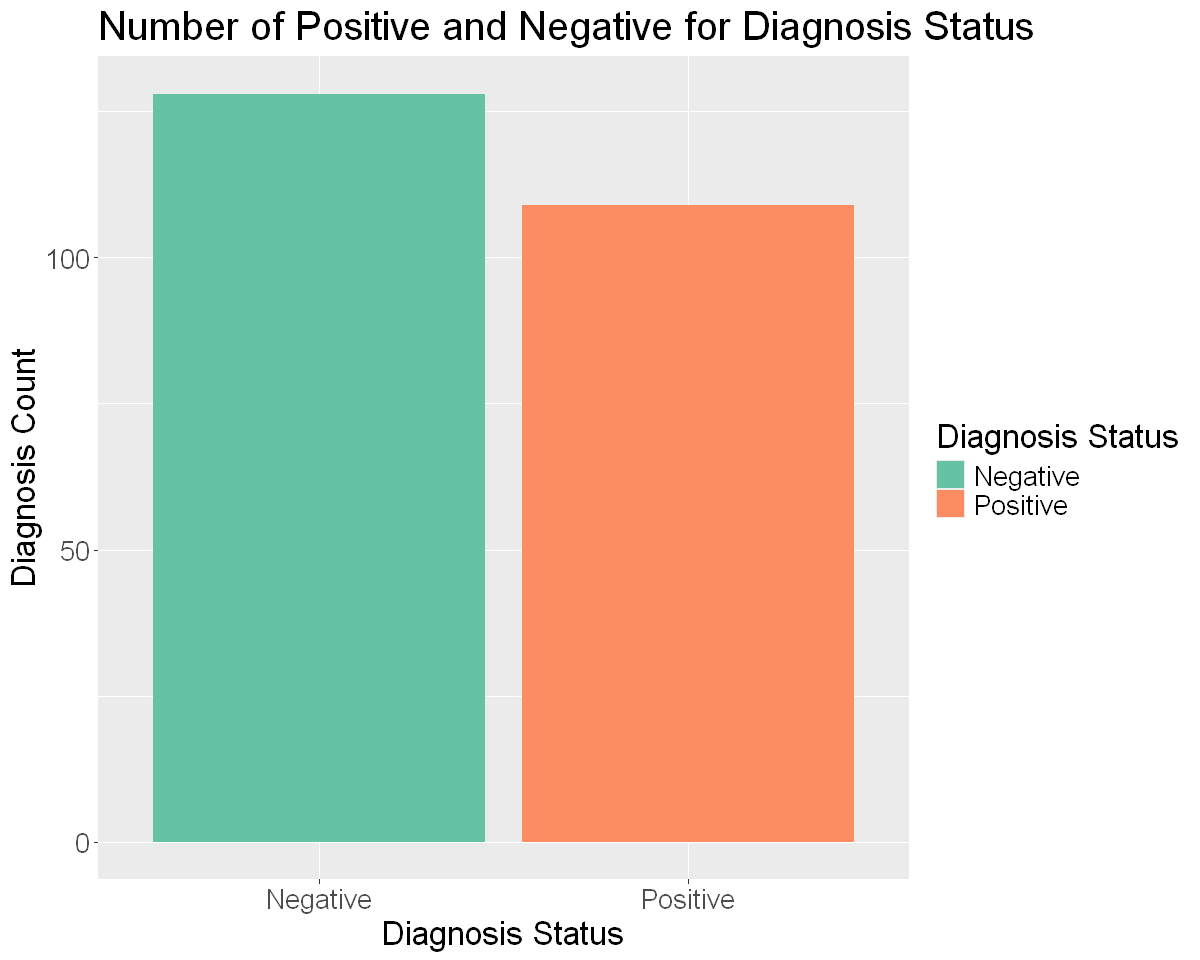

In [119]:
options(repr.plot.width = 10, repr.plot.height = 8)

# number of data points for each diagnosis status
status_dist <- cleveland_train |>
  ggplot(aes(x = num, fill = num)) +
  geom_bar(position = "identity") +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Number of Positive and Negative for Diagnosis Status",
       x = "Diagnosis Status",
       y = "Diagnosis Count",
       fill = "Diagnosis Status") +
  theme(text = element_text(size = 20))

status_dist

**We will not be using age as there is many overlap in the age range of patients who are diagnosed as negative and positive.**

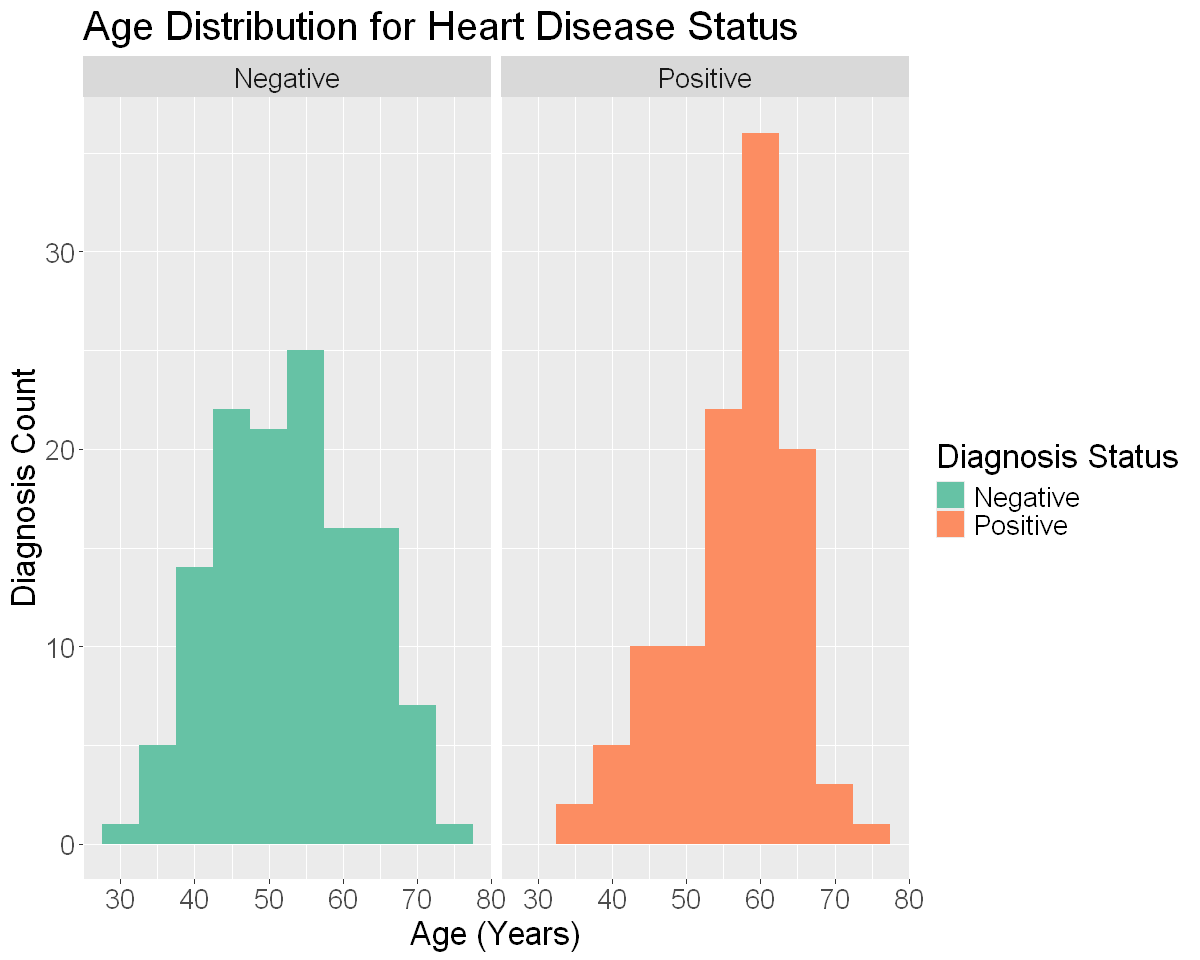

In [120]:
options(repr.plot.width = 10, repr.plot.height = 8)

# graph to compare the age and diagnosis count for diagnosis type
age_dist <- cleveland_train |>
  ggplot(aes(x = age, fill = num)) +
  geom_histogram(position = "identity", binwidth = 5) +
  scale_fill_brewer(palette = "Set2") +
  facet_grid(cols = vars(num)) +
  labs(title = "Age Distribution for Heart Disease Status",
       x = "Age (Years)",
       y = "Diagnosis Count",
       fill = "Diagnosis Status") +
  theme(text = element_text(size = 20))

age_dist


**The overlap shown in the graph tells us that `sex` is not ideal for predicting.**

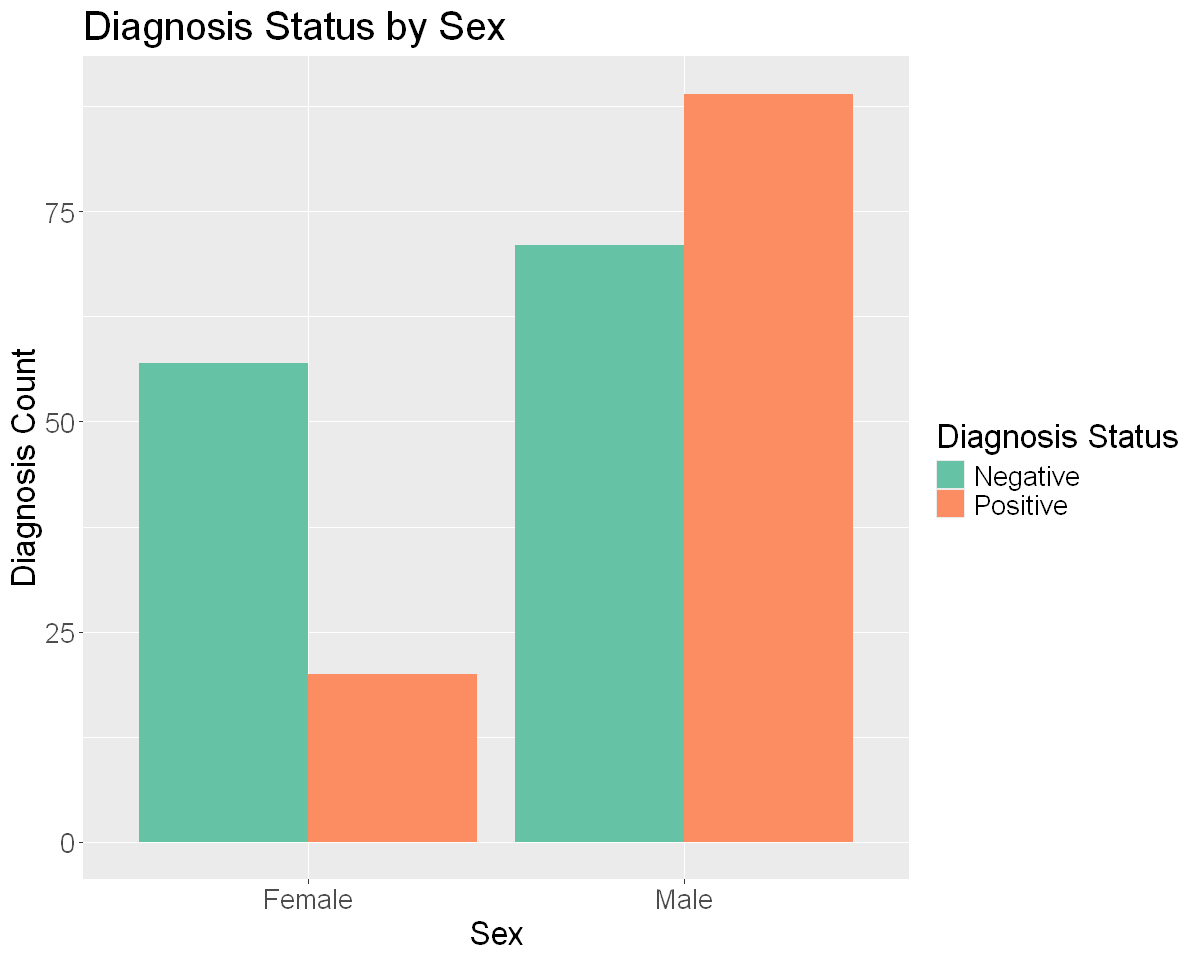

In [121]:
# graph to compare the sex and diagnosis count
gender_dist <- cleveland_train |>
  mutate(sex = as_factor(sex)) |>
  mutate(sex = fct_recode(sex, "Male" = "1", "Female" = "0")) |>
  ggplot(aes(x = as_factor(sex), fill = num)) +
  geom_bar(position = "dodge") +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Diagnosis Status by Sex",
       x = "Sex",
       y = "Diagnosis Count",
       fill = "Diagnosis Status") +
  theme(text = element_text(size = 20))

gender_dist

**Each category of chest pain seems to associate strongly with either the positive or negative diagnosis status. This makes `cp` ideal for predicting.**

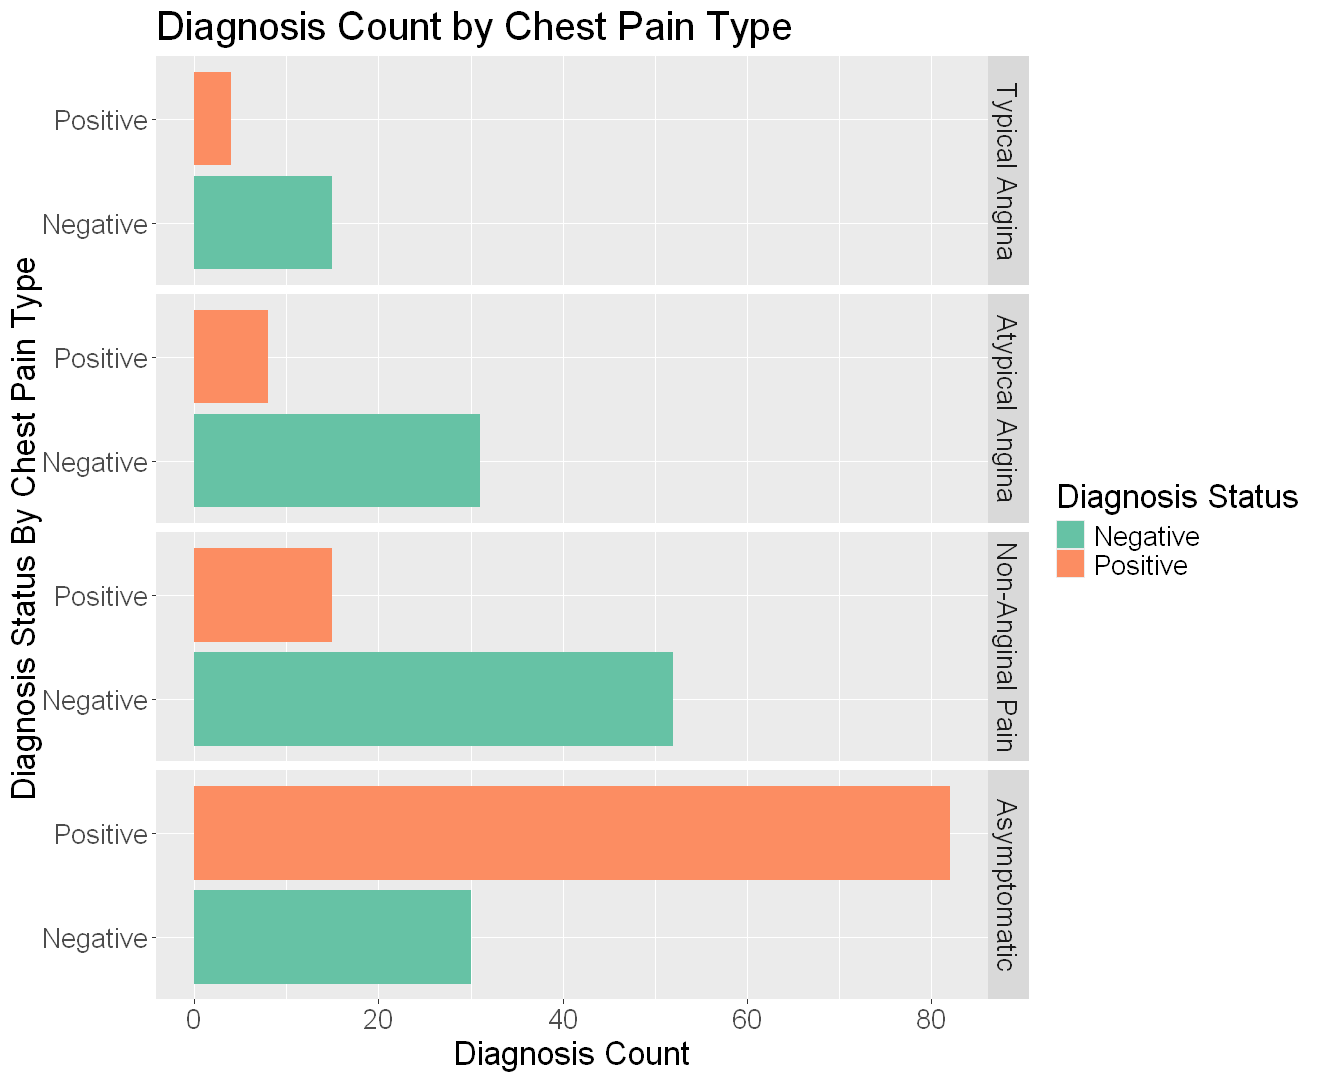

In [122]:
options(repr.plot.width = 11, repr.plot.height = 9)
# graph to compare the cp and diagnosis count
cp_dist <- cleveland_train |>
  mutate(cp = factor(cp, levels = c(1, 2, 3, 4),
                     labels = c("Typical Angina",
                                "Atypical Angina",
                                "Non-Anginal Pain",
                                "Asymptomatic"))) |>
  ggplot(aes(y = num, fill = num)) +
  geom_bar(position = "dodge") +
  facet_grid(rows = vars(cp)) +
  labs(title = "Diagnosis Count by Chest Pain Type",
       x = "Diagnosis Count",
       y = "Diagnosis Status By Chest Pain Type",
       fill = "Diagnosis Status") +
  scale_fill_brewer(palette = "Set2") +
  theme(text = element_text(size = 20))

cp_dist

**Contradicting with the research, the plot shown below of `trestbps`(resting blood pressure) have a lot of overlap of data. This makes `trestbps` not an ideal predictor.**

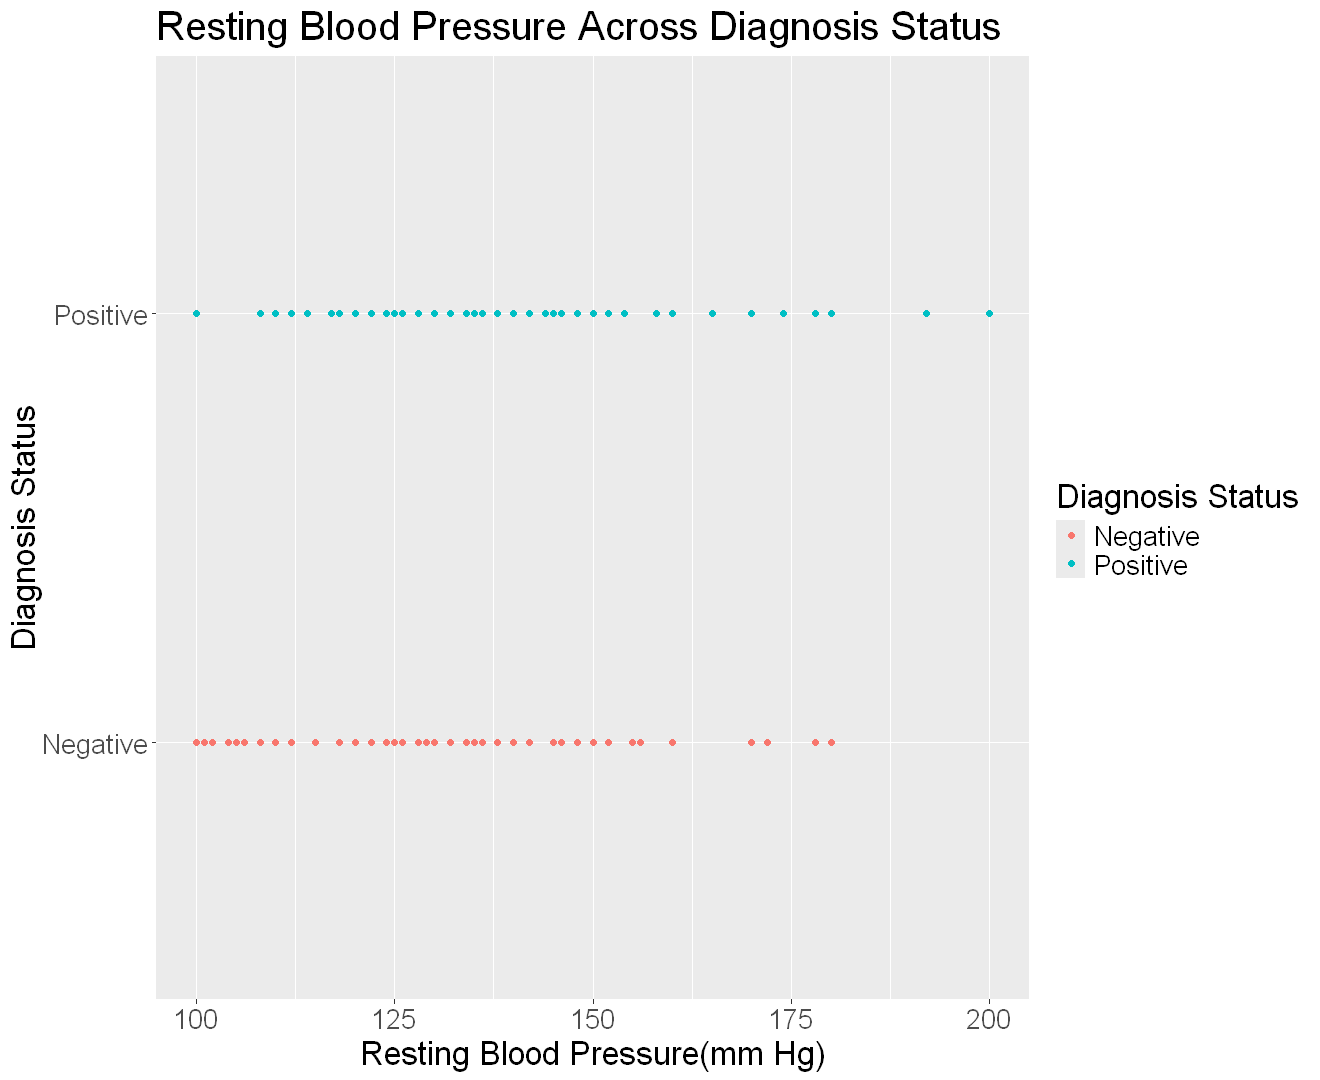

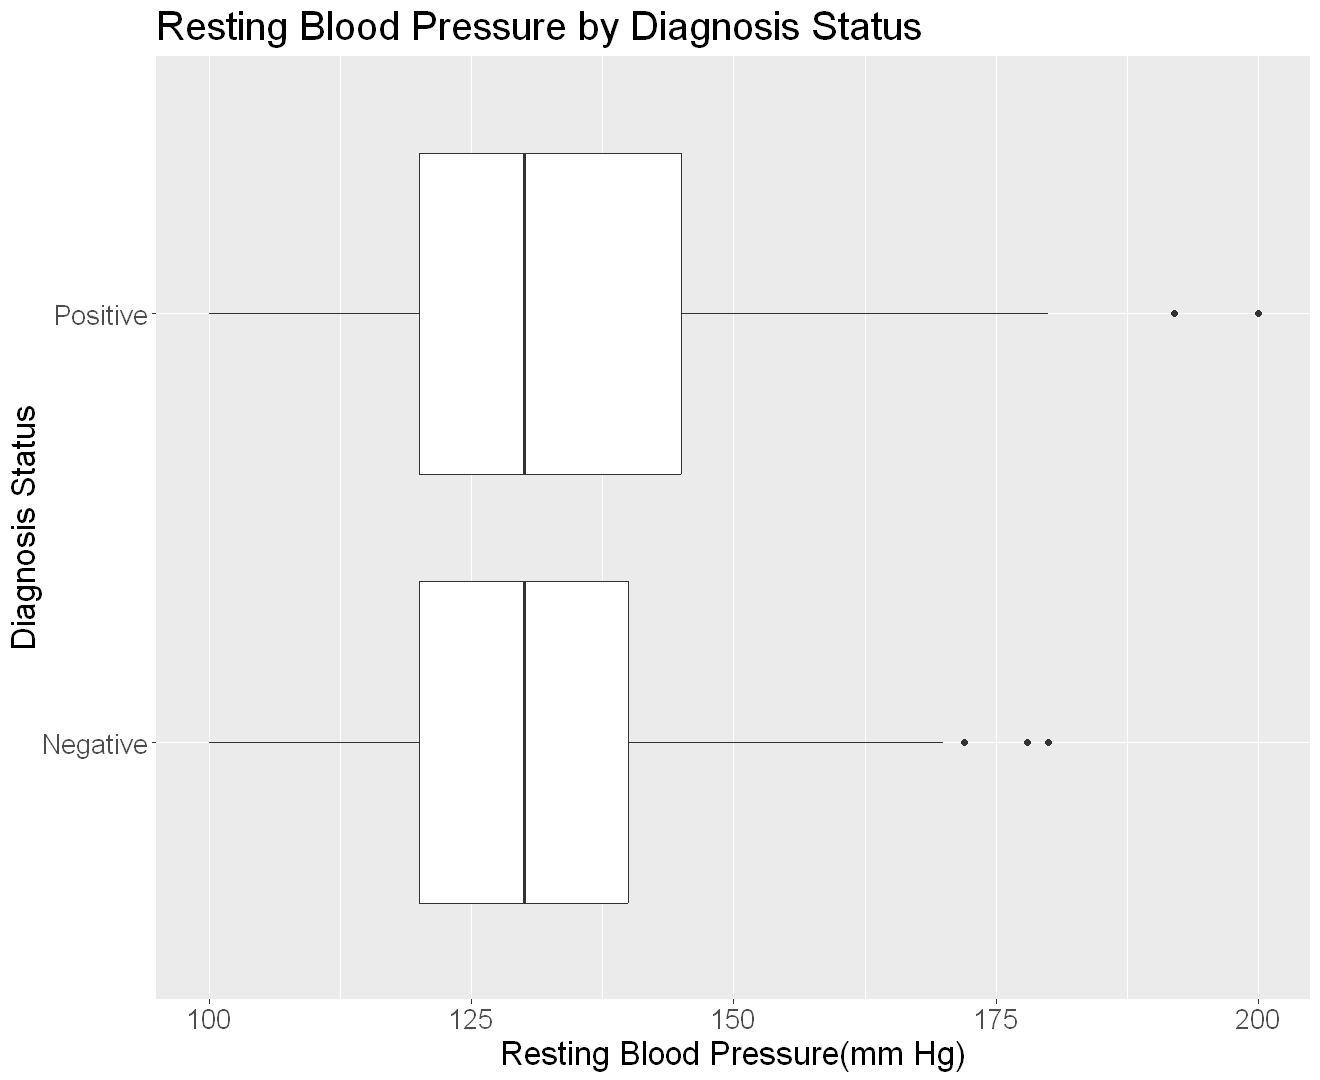

In [145]:

trestbps_dist <- cleveland_train |>
  ggplot(aes(y = num,
             x = trestbps,
             color = num)) +
  geom_point() +
  labs(title = "Resting Blood Pressure Across Diagnosis Status",
       x = "Resting Blood Pressure(mm Hg)",
       y = "Diagnosis Status",
       color = "Diagnosis Status") +
  scale_fill_brewer(palette = "Set2") +
  theme(text = element_text(size = 20))

trestbps_dist

trestbps_dox <- cleveland_train|>
  ggplot(aes(y = num, x = trestbps)) +
  geom_boxplot() +
  labs(title = "Resting Blood Pressure by Diagnosis Status",
       x = "Resting Blood Pressure(mm Hg)",
       y = "Diagnosis Status",
       color = "Diagnosis Status") +
  theme(text = element_text(size = 20))

trestbps_dox

**Further plotting will continue in the final report.**

### Methods

Explain how you will conduct either your data analysis and which variables/columns you will use. 

Note - you do not need to use all variables/columns that exist in the raw data set. 
In fact, that's often not a good idea. 

For each variable think: is this a useful variable for prediction?

Describe at least one way that you will visualize the results


kNN is an algorithm that does not work well with many predictors. To choose the predictors used for kNN, we have determined from research that cp, trestbps, chol, and thalach are good indicators for heart disease.

### Expected Outcomes And Significance

We expect our selected variables to accurately predict the status of heart disease in a patient. That being said, we also expect positive correlations between our variables and the abundance of heart disease. Since we are using reliable data obtained from medical tests, if we are successful in our predictions, there would be implications that the threat of heart disease could be evidently reduced; Accelerated identification of potential heart disease victims will offer more time for medical professionals to monitor and prepare treatment for patients before official diagnostics. Our findings could also become the basis of future predictive models, as a successful predictive model would prove our initial hypothesis true, in which other variables could potentially offer further accuracy in predicting potential heart disease or any other afflictions in individuals. Future conducted tests could be funded to include a broader range of attributes measured in order to find additional relevant factors to one's risk of disease.



### Sources
https://archive.ics.uci.edu/dataset/45/heart+disease

https://www.health.ny.gov/diseases/cardiovascular/heart_disease/#:~:text=About%20695%2C000%20people%20die%20of,killing%20approximately%20375%2C476%20people%20annually.